<a href="https://colab.research.google.com/github/DanielAndresSmg/Penguin-Dataset-Analysis/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

> Pemblokiran indentasi



Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter.csv
Saving penguins_size.csv to penguins_size.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

Memanggil tabel data

In [ ]:
data


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
study_data

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
study_data.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


***
**Insight**
***
Berapa rata - rata body mass penguin? 4201.754386

In [ ]:
Avg_body_mass = data['body_mass_g'].mean()
Avg_body_mass

4201.754385964912

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
#input your code here
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
#Cek missing value
study_data.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [ ]:
#input your code here


Mengisi missing value pada sex dengan modus!

In [ ]:
#input your code here

import statistics as stats
modus = stats.mode(data['sex'])
data['sex'] = data['sex'].fillna(modus)
# atau kita bisa pakai .replace() untuk mengganti fillna
data.isnull().sum()


species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [ ]:
#Untuk mencheck data apakah ada data yang berisik titik.
data['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
# Menghapus / drop row yang kolom sexnya berisi nilai "."
data = data[~(data['sex']=='.')]

Cek kembali apakah masih ada missing value!

In [ ]:
#Mengisi missing value
data['sex'].value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value? Missing value sudah tidak ada lagi
Tapi hanya untuk kolom sex

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

Adelie       152
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

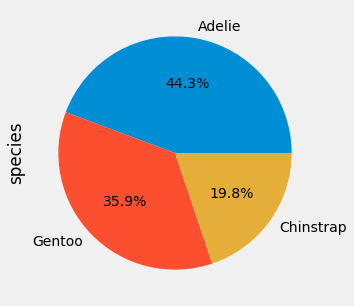

In [ ]:
#input your code here
grafik_jlh_spesies = data['species'].value_counts().plot.pie(autopct='%1.1f%%')
data['species'].value_counts()

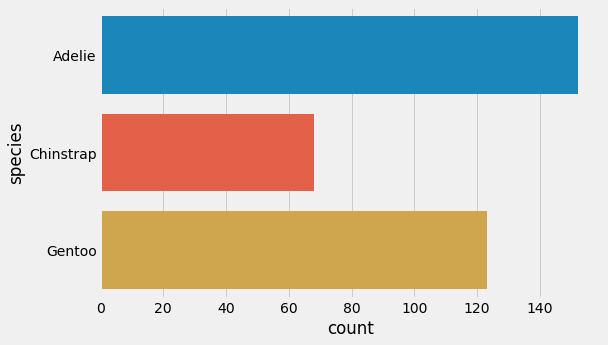

In [ ]:
# untuk menunjukkan grafik secara histograf
sns.countplot(y='species', data=data)
plt.show()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

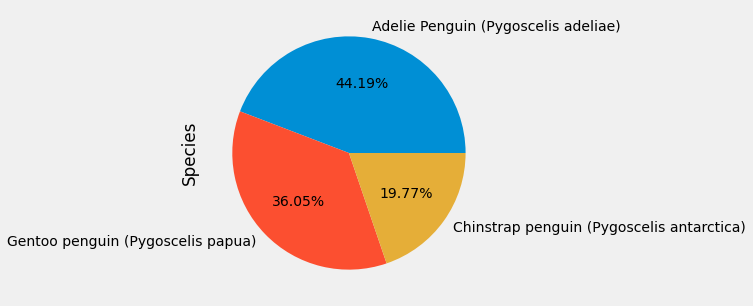

In [ ]:
# Grafik yang menunjukkan jumlah tiap spesies pinguin dari study_data
study_data['Species'].value_counts().plot.pie(autopct='%1.2f%%')
study_data['Species'].value_counts()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Adelie Penguin (Pygoscelis adeliae) dengan jumlah 152

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

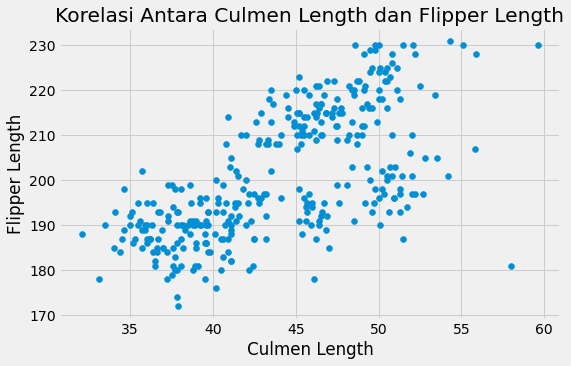

In [ ]:
#input your code here
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'])
plt.xlabel('Culmen Length')
plt.ylabel('Flipper Length')
plt.title('Korelasi Antara Culmen Length dan Flipper Length')

plt.show()

In [ ]:
# aku telah mencoba untuk menggunakan alt tapi visualnya tidak keluar
# alt.Chart(data).mark_circle().encode(
#       x=alt.X('culmen_length_mm:Q', title='Culmen Length'),
#       y=alt.Y('flipper_length_mm:Q', title='Flipper Lengts')
#       ).properties(title='Korelasi Antara Culmen Length dan Flipper Length'
#           )


***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

In [ ]:
# Karena pada grafik menunjukan titik dari kiri bawah ke kanan atas, itu artinya korelasi positif
# Koreasi postif ialah hubungan antara dua variabel ketika kedua variabel itu bergerak dalam arah yang sama. 
# Jika culmen_length_mm meningkat maka flipper_length_mm pun meningkat dan sebaliknya

# walaupun datanya tidak terlalu rapat atau ada juga beberapa data yang outlier

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

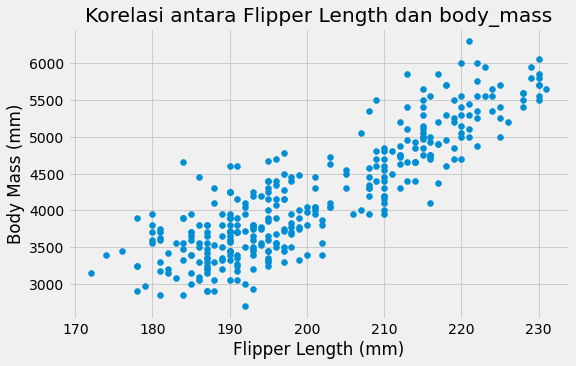

In [ ]:
#input your code here
plt.scatter(data['flipper_length_mm'], data['body_mass_g'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Korelasi antara Flipper Length dan body_mass')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

In [ ]:
# Karena pada grafik menunjukan titik dari kiri bawah ke kanan atas, itu artinya korelasi positif
# Koreasi postif ialah hubungan antara dua variabel ketika kedua variabel itu bergerak dalam arah yang sama. 
# Jika body_mass meningkat maka flipper_length_mm pun meningkat dan sebaliknya

# hal ini berbeda dengan data sebelumnya yang mana hanya sedikit outlier pada grafik tersebut

Tampilkan pairplot dari semua variabel!

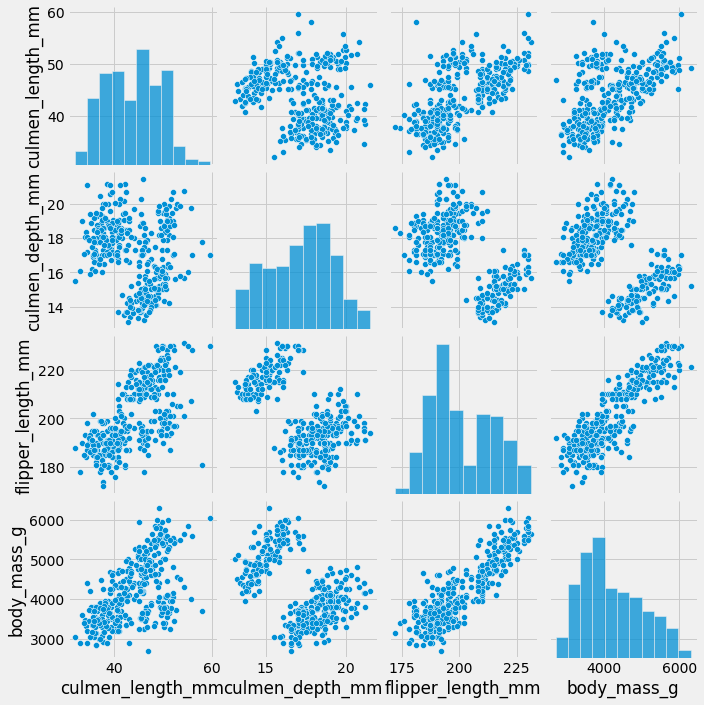

In [ ]:
#input your code here
#input your code here
sns.pairplot(data)

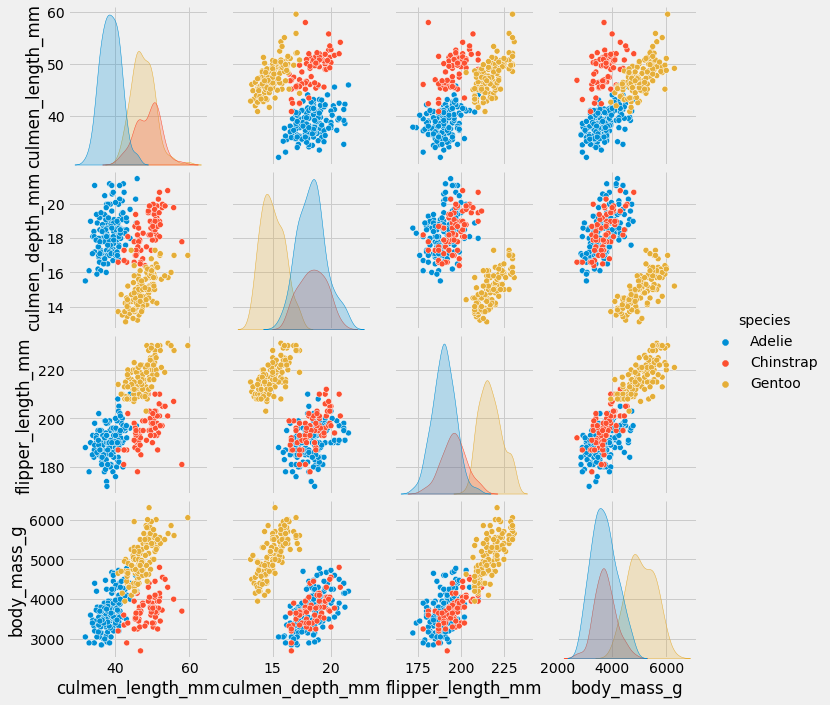

In [ ]:
sns.pairplot(data, hue="species")

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

Dari pairplot yang ditampilkan, terdapat beberapa kesimpulan yang dapat diambil mengenai hubungan antar variabel pada data pinguin:

1. Berdasarkan scatterplot diatas pada pair plot ditas, dapat kita lihat bahwa semua variable perspesies berkorelasi positif. Hal ini dapat dilihat dari grafik diatas bahwa semua menunjukan titik dari kiri bawah ke kanan atas, itu artinya korelasi positif yang berarti hubungan antara dua variabel ketika kedua variabel itu bergerak dalam arah yang sama. 
2. Terdapat beberapa perbedaan yang sangat signifikat yang membuat kita mudah membedakan jenis pinguin. Jenis pinguin yang paling jauh berpedaannya ialah pinguin Gntoo karena lebih berat dan sirip yang panjang. Dan sisanya untuk perseberan titik untuk jenis pinguin lainnya sangat berdekatan atau berhimpit